In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

<h2> Reading Data </h2>


In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train_original = train.copy()
test_original = test.copy()

In [4]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [6]:
train.shape

(614, 13)

In [7]:
train=train.drop('Loan_ID',axis=1)
test=test.drop('Loan_ID',axis=1)

<h2> Understanding Data & Uni Variate Analysis</h2>

In [8]:
train.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [9]:
train.shape, test.shape

((614, 12), (367, 11))

In [10]:
train['Loan_Status'].value_counts() #Frequency table for target variable

Y    422
N    192
Name: Loan_Status, dtype: int64

<AxesSubplot:xlabel='Loan Status', ylabel='Frequency'>

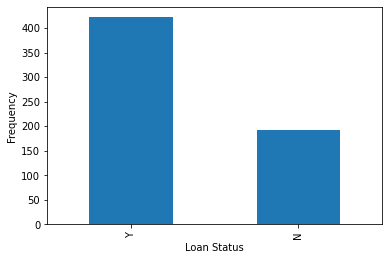

In [12]:
train['Loan_Status'].value_counts().plot.bar(xlabel='Loan Status',ylabel='Frequency')
# plt.set_xlabel('Loan Status')
# plt.set_ylabel('Frequency')

<AxesSubplot:>

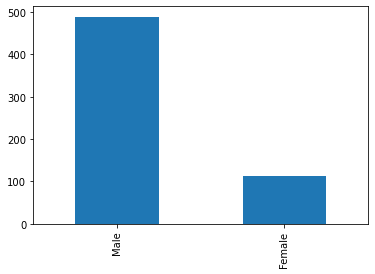

In [13]:
train['Gender'].value_counts().plot.bar()

<AxesSubplot:>

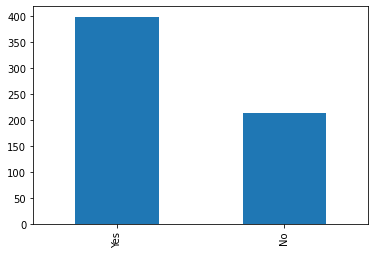

In [14]:
train['Married'].value_counts().plot.bar()

<AxesSubplot:>

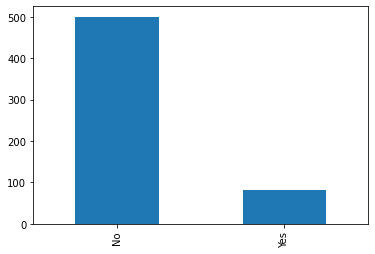

In [15]:
train['Self_Employed'].value_counts().plot.bar()

<AxesSubplot:>

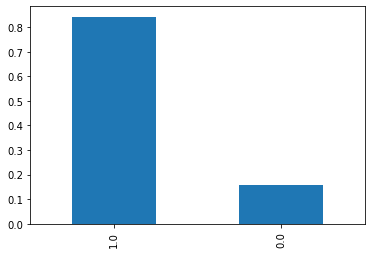

In [16]:
train['Credit_History'].value_counts(normalize=True).plot.bar()

<AxesSubplot:>

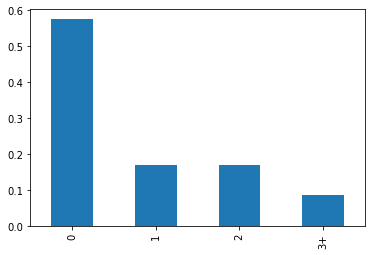

In [17]:
train['Dependents'].value_counts(normalize=True).plot.bar()

<AxesSubplot:>

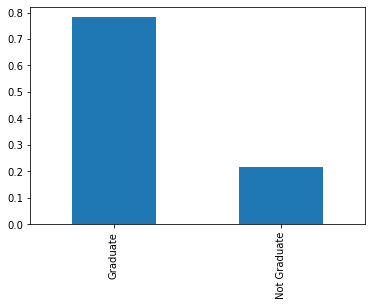

In [18]:
train['Education'].value_counts(normalize=True).plot.bar()

<AxesSubplot:>

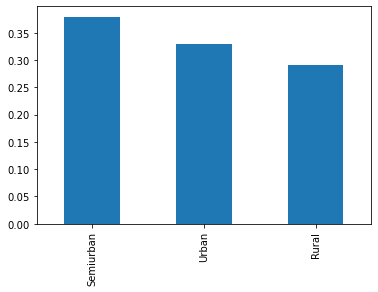

In [19]:
train['Property_Area'].value_counts(normalize=True).plot.bar()

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

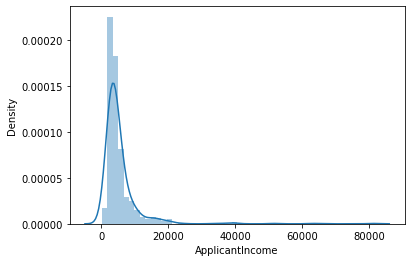

In [20]:
sns.distplot(train['ApplicantIncome'])

<AxesSubplot:>

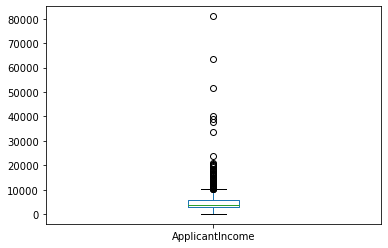

In [21]:
train['ApplicantIncome'].plot.box()

<AxesSubplot:title={'center':'ApplicantIncome'}, xlabel='Education'>

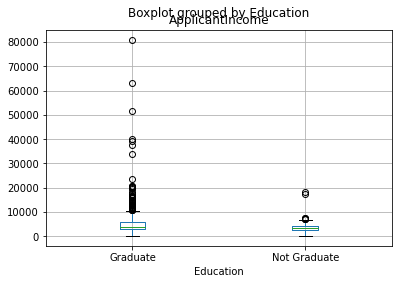

In [22]:
train.boxplot(column='ApplicantIncome', by = 'Education')

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

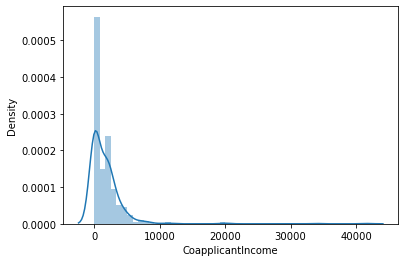

In [23]:
sns.distplot(train['CoapplicantIncome'])

<AxesSubplot:>

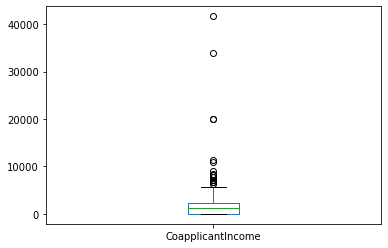

In [24]:
train['CoapplicantIncome'].plot.box()

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

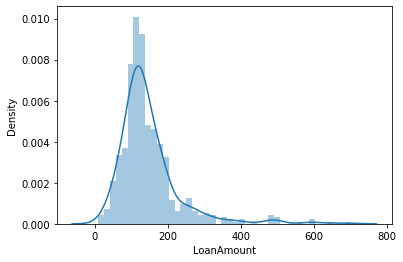

In [25]:
sns.distplot(train['LoanAmount'])

<AxesSubplot:>

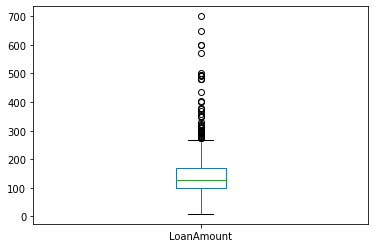

In [26]:
train['LoanAmount'].plot.box()

<h2> Bivariate Analysis </h2>

<AxesSubplot:xlabel='Gender', ylabel='Probability'>

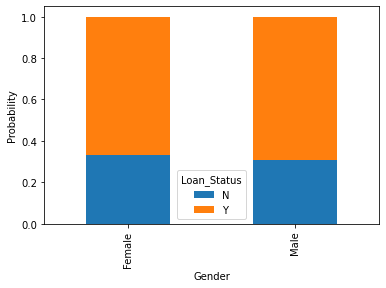

In [27]:
Gender  = pd.crosstab(train['Gender'], train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis = 0).plot(kind='bar', ylabel='Probability',stacked=True)

<AxesSubplot:xlabel='Married', ylabel='Probabiity'>

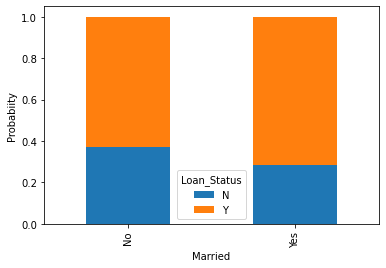

In [28]:
Married  = pd.crosstab(train['Married'], train['Loan_Status'])
Married.div(Married.sum(1).astype(float), axis = 0).plot(kind='bar', ylabel="Probabiity",stacked=True)

<AxesSubplot:xlabel='Education', ylabel='Probabiity'>

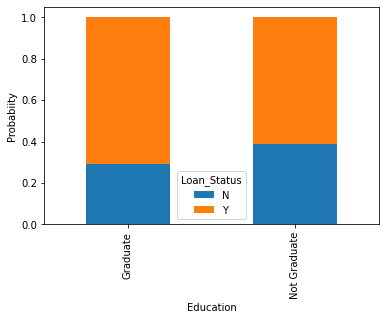

In [29]:
Education  = pd.crosstab(train['Education'], train['Loan_Status'])
Education.div(Education.sum(1).astype(float), axis = 0).plot(kind='bar', ylabel="Probabiity",stacked=True)

<AxesSubplot:xlabel='Self_Employed', ylabel='Probabiity'>

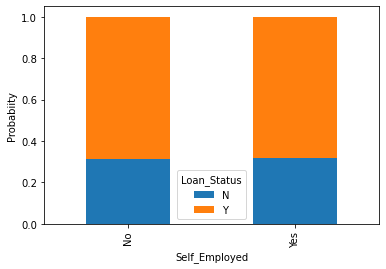

In [30]:
Self_Employed  = pd.crosstab(train['Self_Employed'], train['Loan_Status'])
Self_Employed.div(Self_Employed.sum(1).astype(float), axis = 0).plot(kind='bar', ylabel="Probabiity", stacked=True)

<AxesSubplot:xlabel='Dependents', ylabel='Probabiity'>

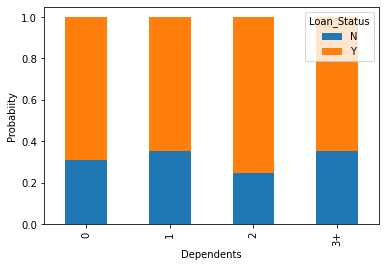

In [31]:
Dependents  = pd.crosstab(train['Dependents'], train['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float), axis = 0).plot(kind='bar',ylabel="Probabiity",stacked=True)

<AxesSubplot:xlabel='Credit_History', ylabel='Probabiity'>

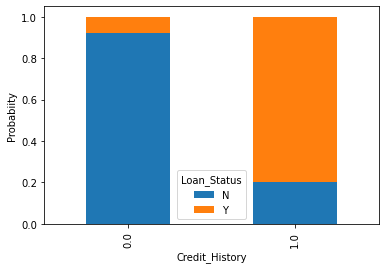

In [33]:
Credit_History  = pd.crosstab(train['Credit_History'], train['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float), axis = 0).plot(kind='bar', ylabel="Probabiity",stacked=True)

<AxesSubplot:xlabel='Property_Area', ylabel='Probabiity'>

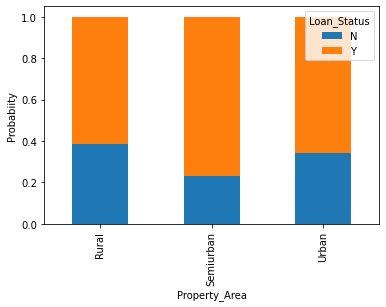

In [34]:
Property_Area  = pd.crosstab(train['Property_Area'], train['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype(float), axis = 0).plot(kind='bar',ylabel="Probabiity", stacked=True)

<AxesSubplot:xlabel='Loan_Status'>

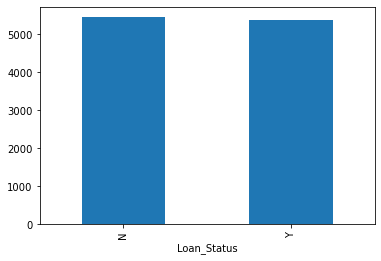

In [35]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

<AxesSubplot:xlabel='Income_bin'>

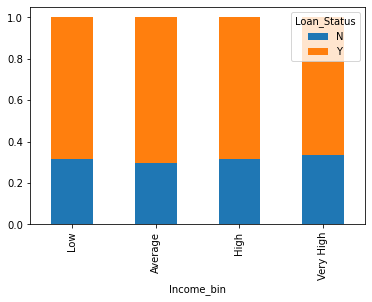

In [36]:
bins = [0,2500,4000,6000,81000]
group = ['Low','Average', 'High', 'Very High']
train['Income_bin'] = pd.cut(train['ApplicantIncome'],bins,labels=group)

Income_bin = pd.crosstab(train['Income_bin'],train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)

<AxesSubplot:xlabel='Coapplicant_Income_bin'>

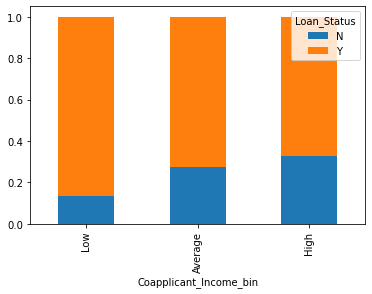

In [37]:
bins = [0,1000,3000,42000]
group = ['Low','Average', 'High']
train['Coapplicant_Income_bin'] = pd.cut(train['CoapplicantIncome'],bins,labels=group)

Coapplicant_Income_bin = pd.crosstab(train['Coapplicant_Income_bin'],train['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)

<AxesSubplot:xlabel='Total_Income_bin'>

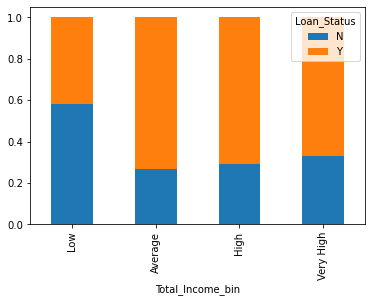

In [38]:
train['Total_Income'] = train['ApplicantIncome'] + train['CoapplicantIncome']

bins = [0,2500,4000,6000,81000]
group = ['Low','Average', 'High', 'Very High']
train['Total_Income_bin'] = pd.cut(train['Total_Income'],bins,labels=group)

Total_Income_bin = pd.crosstab(train['Total_Income_bin'],train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)

<AxesSubplot:xlabel='LoanAmount_bin'>

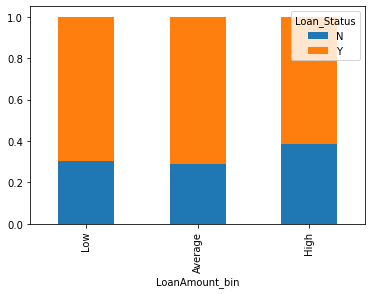

In [39]:
bins = [0,100,200,700]
group = ['Low','Average', 'High']
train['LoanAmount_bin'] = pd.cut(train['LoanAmount'],bins,labels=group)

LoanAmount_bin = pd.crosstab(train['LoanAmount_bin'],train['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)

In [40]:
#Lets drop the extra variables we created for exploration
train = train.drop(['Income_bin', 'Coapplicant_Income_bin', 'LoanAmount_bin', 'Total_Income_bin','Total_Income'], axis=1)

In [41]:
#Converting categorical to numerical
train['Dependents'].replace('3+', 3, inplace=True)
test['Dependents'].replace('3+', 3, inplace=True)
train['Loan_Status'].replace('N', 0, inplace=True)
train['Loan_Status'].replace('Y', 1, inplace=True)

<AxesSubplot:>

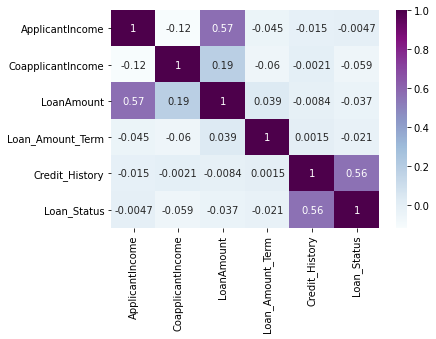

In [42]:
matrix = train.corr()
sns.heatmap(matrix, cmap="BuPu",annot=True)

<h2> Missing value and Outlier Treatment </h2>

In [43]:
train.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [44]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

In [45]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [46]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)

In [47]:
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [48]:
train.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [49]:
test.isnull().sum()

Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [50]:
test['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
test['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace=True)
test['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0],inplace=True)
test['LoanAmount'].fillna(train['LoanAmount'].median(),inplace=True)

In [51]:
test.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

<AxesSubplot:>

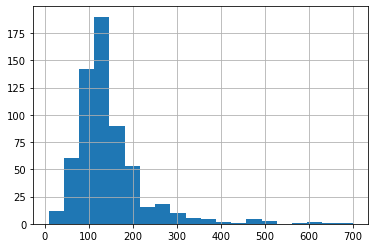

In [56]:
train['LoanAmount'].hist(bins=20)

Outlier Treatment - As we have seen earlier we have observed the outliers in Loan Amount Variable which is right skewed
For treating right skewedness we can apply log transformations which does not affect smaller values much, but reduces the larger values. So, we get a distribution similar to normal distribution.

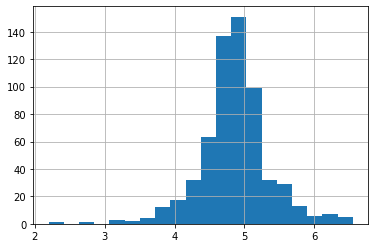

In [22]:
train['LoanAmount_log'] = np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)
test['LoanAmount_log'] = np.log(test['LoanAmount'])

<h2> Bulding Model </h2>

In [23]:
train.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'LoanAmount_log'],
      dtype='object')

In [24]:
train.shape, test.shape

((614, 13), (367, 12))

In [25]:
X = train.drop('Loan_Status',1)
y = train.Loan_Status

In [26]:
X = pd.get_dummies(X)
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [27]:
X.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'LoanAmount_log', 'Gender_Female',
       'Gender_Male', 'Married_No', 'Married_Yes', 'Dependents_0',
       'Dependents_1', 'Dependents_2', 'Dependents_3+', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

In [28]:
test.shape

(367, 21)

In [43]:
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size = 0.3)

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept = True, intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,penalty='12',random_state=1,solver='liblinear',tol=0.0001,verbose=0,warm_start=False)

LogisticRegression(multi_class='ovr', n_jobs=1, penalty='12', random_state=1,
                   solver='liblinear')

In [45]:
pred_cv = model.predict(x_cv)

In [46]:
accuracy_score(y_cv, pred_cv)

0.8216216216216217

In [49]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(pred_cv, y_cv)
confusion

array([[ 23,   6],
       [ 27, 129]], dtype=int64)

In [50]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [51]:
TP / float(TP+FN) #Sensitivity

0.8269230769230769

In [52]:
TN / float(TN+FP) #Specificity

0.7931034482758621

In [66]:
from sklearn.metrics import roc_curve, roc_auc_score
y_score = model.predict_proba(x_cv)[:,1]
fp_rate,tp_rate,threshold = roc_curve(y_cv, y_score)
roc_auc_score(y_cv, y_score)

0.7578456318914334

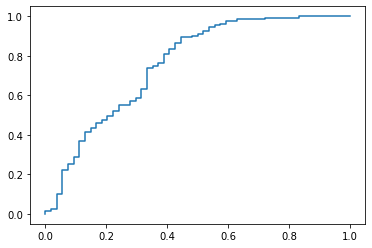

In [67]:
plt.plot(fp_rate,tp_rate)
plt.show()

<h2>Logistic Regression using K-Fold Cross Validation</h2>

In [68]:
from sklearn.model_selection import StratifiedKFold

i=1
kf = StratifiedKFold(n_splits=5, random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.iloc[train_index],X.iloc[test_index]
    ytr,yvl = y.iloc[train_index],y.iloc[test_index]
    model = LogisticRegression(random_state=1)
    model.fit(xtr,ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    print('accuracy_score',score)
    i += 1
    pred_test = model.predict(test)
    pred = model.predict_proba(xvl)[:,1]


1 of kfold 5
accuracy_score 0.8048780487804879

2 of kfold 5
accuracy_score 0.8373983739837398

3 of kfold 5
accuracy_score 0.7804878048780488

4 of kfold 5
accuracy_score 0.7886178861788617

5 of kfold 5
accuracy_score 0.7950819672131147


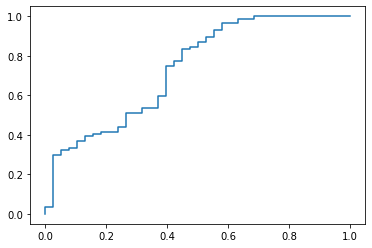

In [69]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(yvl, pred)
auc = metrics.roc_auc_score(yvl, pred)
plt.plot(fpr,tpr)
plt.show()

In [70]:
roc_auc_score(yvl, pred)

0.7346491228070176

<h2> Feature Engineering </h2>


In [65]:
train['Total_Income'] = train['ApplicantIncome']+train['CoapplicantIncome']
test['Total_Income'] = test['ApplicantIncome']+test['CoapplicantIncome']

<AxesSubplot:xlabel='Total_Income', ylabel='Density'>

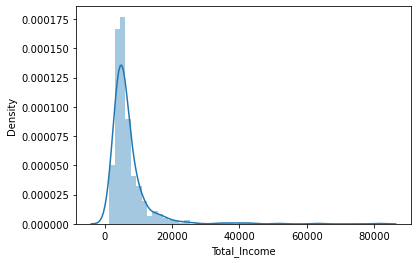

In [66]:
sns.distplot(train['Total_Income'])

<AxesSubplot:xlabel='Total_Income_log', ylabel='Density'>

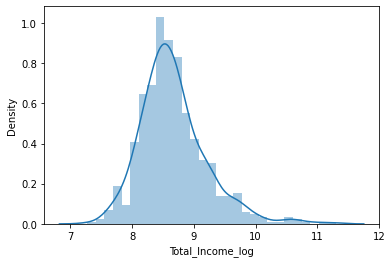

In [67]:
# It is right Skewed so lets apply log transformation
train['Total_Income_log'] = np.log(train['Total_Income'])
sns.distplot(train['Total_Income_log'])

In [68]:
test['Total_Income_log'] = np.log(test['Total_Income'])

<AxesSubplot:xlabel='EMI', ylabel='Density'>

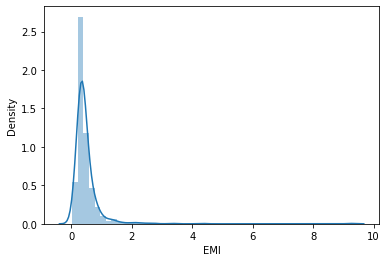

In [69]:
train['EMI'] = train['LoanAmount'] / train['Loan_Amount_Term']
test['EMI'] = test['LoanAmount'] / test['Loan_Amount_Term']
sns.distplot(train['EMI'])

In [70]:
train['Balance Income'] = train['Total_Income'] -(train['EMI']*1000)
test['Balance Income'] = test['Total_Income'] -(test['EMI']*1000)

In [71]:
train = train.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)
test = test.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)

In [72]:
train.columns

Index(['Credit_History', 'Loan_Status', 'LoanAmount_log', 'Gender_Female',
       'Gender_Male', 'Married_No', 'Married_Yes', 'Dependents_3',
       'Dependents_0', 'Dependents_1', 'Dependents_2', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban', 'Property_Area_Urban',
       'Total_Income', 'Total_Income_log', 'EMI', 'Balance Income'],
      dtype='object')

In [73]:
X = train.drop('Loan_Status',axis=1)

In [74]:
y = train.Loan_Status

In [75]:
i=1
kf = StratifiedKFold(n_splits=5, random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.iloc[train_index],X.iloc[test_index]
    ytr,yvl = y.iloc[train_index],y.iloc[test_index]
    model = LogisticRegression(random_state=1)
    model.fit(xtr,ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    print('accuracy_score',score)
    i += 1
    pred_test = model.predict(test)
    pred = model.predict_proba(xvl)[:,1]


1 of kfold 5
accuracy_score 0.7886178861788617

2 of kfold 5
accuracy_score 0.6910569105691057

3 of kfold 5
accuracy_score 0.6666666666666666

4 of kfold 5
accuracy_score 0.7804878048780488

5 of kfold 5
accuracy_score 0.680327868852459


<h2> Using Random Forest </h2>

In [71]:
from sklearn.ensemble import RandomForestClassifier

In [72]:
i=1
kf = StratifiedKFold(n_splits=5, random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.iloc[train_index],X.iloc[test_index]
    ytr,yvl = y.iloc[train_index],y.iloc[test_index]
    model = RandomForestClassifier(random_state=1,max_depth=10)
    model.fit(xtr,ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    print('accuracy_score',score)
    i += 1
    pred_test = model.predict(test)
    pred = model.predict_proba(xvl)[:,1]


1 of kfold 5
accuracy_score 0.8130081300813008

2 of kfold 5
accuracy_score 0.8455284552845529

3 of kfold 5
accuracy_score 0.7967479674796748

4 of kfold 5
accuracy_score 0.8130081300813008

5 of kfold 5
accuracy_score 0.7540983606557377


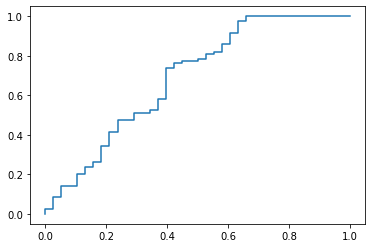

In [73]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(yvl, pred)
auc = metrics.roc_auc_score(yvl, pred)
plt.plot(fpr,tpr)
plt.show()

In [74]:
roc_auc_score(yvl, pred)

0.68828320802005

<h3> Support Vector Classifier </h3>

In [12]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')

In [31]:
clf.fit(x_train, y_train)

SVC()

In [32]:
pred_cv = clf.predict(x_cv)

In [33]:
accuracy_score(y_cv, pred_cv)

0.6432432432432432

<h3> Gausian Naive Bayes </h3>

In [34]:
from sklearn.naive_bayes import GaussianNB

In [35]:
gnb = GaussianNB() 
gnb.fit(x_train, y_train)

GaussianNB()

In [36]:
pred_cv = gnb.predict(x_cv)

In [37]:
accuracy_score(y_cv, pred_cv)

0.7891891891891892

In [39]:
from sklearn.model_selection import StratifiedKFold

In [41]:
i=1
kf = StratifiedKFold(n_splits=5, random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.iloc[train_index],X.iloc[test_index]
    ytr,yvl = y.iloc[train_index],y.iloc[test_index]
    model = GaussianNB()
    model.fit(xtr,ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    print('accuracy_score',score)
    i += 1
    pred_test = model.predict(test)
    pred = model.predict_proba(xvl)[:,1]


1 of kfold 5
accuracy_score 0.7967479674796748

2 of kfold 5
accuracy_score 0.8373983739837398

3 of kfold 5
accuracy_score 0.7560975609756098

4 of kfold 5
accuracy_score 0.7804878048780488

5 of kfold 5
accuracy_score 0.7868852459016393
